In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget


free_movements = pd.read_csv('free_movements.csv', index_col=0)

OMG_CH = [str(i) for i in range(50)]

ACC_CH = ['ACC0', 'ACC1', 'ACC2']
GYR_CH = ['GYR0', 'GYR1', 'GYR2']
# ENC_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
GLOVE_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH = ['BUTTON', 'SYNC', 'ts']

assert len(OMG_CH)+len(ACC_CH)+len(GYR_CH)+len(GLOVE_CH)+len(BUTTON_SYNC_TS_CH) == free_movements.shape[-1]

gestures_train = pd.read_csv('gestures_train.csv', index_col=0)
gestures_test = pd.read_csv('gestures_test.csv', index_col=0)
gestures_protocol = pd.read_csv('gestures_protocol.csv')

gestures_train_ext = pd.merge(
    gestures_train,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

gestures_test_ext = pd.merge(
    gestures_test,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

In [3]:
from sklearn.metrics import mean_squared_error as mse

def MSE(y, y_pred):
    ENC0 = mse(y[:,0], y_pred[:,0])
    ENC1 = mse(y[:,1], y_pred[:,1])
    ENC2 = mse(y[:,2], y_pred[:,2])
    ENC3 = mse(y[:,3], y_pred[:,3])
    ENC4 = mse(y[:,4], y_pred[:,4])
    ENC5 = mse(y[:,5], y_pred[:,5])
    return pd.Series([ENC0, ENC1, ENC2, ENC3, ENC4, ENC5])

In [117]:
X = gestures_train[OMG_CH].values
X_test = gestures_test[OMG_CH].values
y = gestures_train[GLOVE_CH].values
y_test = gestures_test[GLOVE_CH].values

In [631]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=32).fit(X, y)

In [632]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X, y)

In [633]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(random_state=32).fit(X,y)

In [634]:
y_pred_rfr = RFR.predict(X)
y_test_pred_rfr = RFR.predict(X_test)

y_pred_lr = LR.predict(X)
y_test_pred_lr = LR.predict(X_test)

y_pred_dt = DT.predict(X)
y_test_pred_dt = DT.predict(X_test)


print(pd.DataFrame({'train':MSE(y, y_pred_rfr), 'test':MSE(y_test, y_test_pred_rfr)}))
print()
print(mse(y_test, y_test_pred_rfr))
print()
print(pd.DataFrame({'train':MSE(y, y_pred_lr), 'test':MSE(y_test, y_test_pred_lr)}))
print()
print(mse(y_test, y_test_pred_lr))
print()
print(pd.DataFrame({'train':MSE(y, y_pred_dt), 'test':MSE(y_test, y_test_pred_dt)}))
print()
print(mse(y_test, y_test_pred_dt))

      train        test
0  1.108492   36.746629
1  0.925809   35.379470
2  1.058566   28.481814
3  3.956215  199.747462
4  5.797001  387.436319
5  0.000000    0.000000

114.63194909402564

        train        test
0   44.761241   57.252958
1   35.262227   37.579762
2   47.073603   48.509950
3  207.066172  263.154448
4  423.469831  546.546481
5    0.000000    0.000000

158.84060002758474

   train        test
0    0.0   67.333497
1    0.0   76.912708
2    0.0   69.425930
3    0.0  374.204089
4    0.0  755.806195
5    0.0    0.000000

223.9470698661443


На освнове `LinearRegression` определим набор важных датчиков для каждого пальца

In [635]:
importance = np.swapaxes(LR.coef_, 0, 1)

OMG_0 = []
OMG_1 = []
OMG_2 = []
OMG_3 = []
OMG_4 = []
OMG_5 = []

for i in np.arange(importance.shape[0]):
    if abs(importance[:,0][i]) >= 0.008:
        OMG_0.append(i)
    if abs(importance[:,1][i]) >= 0.008:
        OMG_1.append(i)
    if abs(importance[:,2][i]) >= 0.008:
        OMG_2.append(i)
    if abs(importance[:,3][i]) >= 0.008:
        OMG_3.append(i)
    if abs(importance[:,4][i]) >= 0.008:
        OMG_4.append(i)
    if abs(importance[:,5][i]) >= 0.008:
        OMG_5.append(i)    

In [636]:
LR_0 = LinearRegression().fit(X[:,OMG_0], y[:,0])
LR_1 = LinearRegression().fit(X[:,OMG_1], y[:,1])
LR_2 = LinearRegression().fit(X[:,OMG_2], y[:,2])
LR_3 = LinearRegression().fit(X[:,OMG_3], y[:,3])
LR_4 = LinearRegression().fit(X[:,OMG_4], y[:,4])

y_test_0 = LR_0.predict(X_test[:,OMG_0])
y_test_1 = LR_1.predict(X_test[:,OMG_1])
y_test_2 = LR_2.predict(X_test[:,OMG_2])
y_test_3 = LR_3.predict(X_test[:,OMG_3])
y_test_4 = LR_4.predict(X_test[:,OMG_4])

print('test on LR')
print(mse(y_test[:,0], y_test_0))
print(mse(y_test[:,1], y_test_1))
print(mse(y_test[:,2], y_test_2))
print(mse(y_test[:,3], y_test_3))
print(mse(y_test[:,4], y_test_4))

DT_0 = DecisionTreeRegressor().fit(X[:,OMG_0], y[:,0])
DT_1 = DecisionTreeRegressor().fit(X[:,OMG_1], y[:,1])
DT_2 = DecisionTreeRegressor().fit(X[:,OMG_2], y[:,2])
DT_3 = DecisionTreeRegressor().fit(X[:,OMG_3], y[:,3])
DT_4 = DecisionTreeRegressor().fit(X[:,OMG_4], y[:,4])

y_test_0_1 = DT_0.predict(X_test[:,OMG_0])
y_test_1_1 = DT_1.predict(X_test[:,OMG_1])
y_test_2_1 = DT_2.predict(X_test[:,OMG_2])
y_test_3_1 = DT_3.predict(X_test[:,OMG_3])
y_test_4_1 = DT_4.predict(X_test[:,OMG_4])

print()
print('test on DT')
print(mse(y_test[:,0], y_test_0_1))
print(mse(y_test[:,1], y_test_1_1))
print(mse(y_test[:,2], y_test_2_1))
print(mse(y_test[:,3], y_test_3_1))
print(mse(y_test[:,4], y_test_4_1))

test on LR
61.82609476106584
37.69504751565557
47.72985422304241
268.33760512280645
546.5623653986949

test on DT
63.39605778648384
78.86067580803135
70.80827619980411
269.0788442703232
842.5537463271303


In [638]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=25):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

get_top_abs_correlations(gestures_test[OMG_CH + GLOVE_CH])
corr = ['0', '2', '3', '5', '12', '14', '15', '21', '24', '29', '33']

In [234]:
def moving_average(array, n=6):
    ret = np.cumsum(array, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    result = ret[n - 1:] / n
    filler = np.zeros(n-1)
    filler[filler == 0] = array[:n-1].mean()
    result = np.insert(result, 0, filler)
    return np.rint(result)

def get_moving_avearge(array, n=6):
    result = np.zeros_like(array)
    for i in np.arange(array.shape[1]):
        result[:,i] = moving_average(array[:,i], n)
    return result

In [150]:
def shifter(data, n=20):
    lst = list(data)
    for i in range(n):
        lst.insert(0, i*0)
        lst.pop(-1)
       
    return lst

def get_shifter(array, n=20):
    result = np.zeros_like(array)
    for i in np.arange(array.shape[1]):
        result[:,i] = shifter(array[:,i], n)
    return result

In [125]:
arr = np.copy(X_test[:,0])

In [126]:
for i in np.arange(arr.shape[0]):
    if 2100 < arr[i] < 2200:
        arr[i] = 2100
    if 2000 < arr[i] < 2100:
        arr[i] = 2000
    if 1900 < arr[i] < 2000:
        arr[i] = 1900
    if 1800 < arr[i] < 1900:
        arr[i] = 1800
    if 1700 < arr[i] < 1800:
        arr[i] = 1700
    if 1600 < arr[i] < 1700:
        arr[i] = 1600
    if 1500 < arr[i] < 1600:
        arr[i] = 1500
    if 1400 < arr[i] < 1500:
        arr[i] = 1400

arr

array([1400, 1400, 1400, ..., 1212, 1213, 1215], dtype=int64)

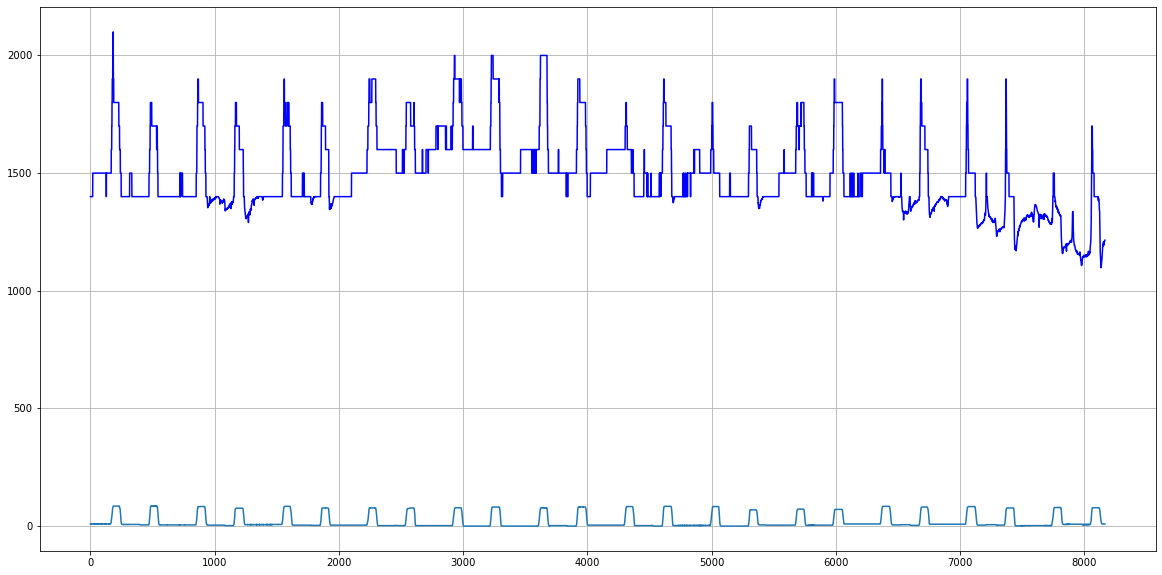

In [127]:


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(arr, color='blue')
ax.plot(y_test[:,0])
ax.grid()

In [46]:
X_new = np.diff(X, axis=0, prepend=0)
X_test_new = np.diff(X_test, axis=0, prepend=0)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

LR = LinearRegression().fit(X_new, y)
DT = DecisionTreeRegressor(random_state=32).fit(X_new,y)

In [48]:
y_pred_lr = LR.predict(X)
y_test_pred_lr = LR.predict(X_test)

y_pred_dt = DT.predict(X)
y_test_pred_dt = DT.predict(X_test)

print(pd.DataFrame({'train':MSE(y, y_pred_lr), 'test':MSE(y_test, y_test_pred_lr)}))
print()
print(mse(y_test, y_test_pred_lr))
print()
print(pd.DataFrame({'train':MSE(y, y_pred_dt), 'test':MSE(y_test, y_test_pred_dt)}))
print()
print(mse(y_test, y_test_pred_dt))

          train          test
0  15103.963672  15267.537955
1  14029.029245  14756.673296
2  15364.524557  17028.715943
3   9085.190190   8780.607308
4   3520.339287   4354.665804
5      0.000000      0.000000

10031.366717639865

         train         test
0   974.460207   863.684378
1   926.700229   955.836435
2  1197.394670  1235.545911
3  1213.815447  1137.422380
4  1610.781412  1646.624388
5     0.000000     0.000000

973.1855819458048
